## Proyecto I - TP2

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [24]:
data = pd.read_csv("C://Users//vicky//Downloads//all-registered-vehicles-to-end-of-30-june-2023.csv")
data.head()

,Make,Model,First Ever Reg'd,Reg'd in Jersey,CC,Colour,CO2,Catgeory,Fuel
0,Peugeot,BOXPRO 333L1H1 120,08/12/2020,08/12/2020,2200.0,White,154.0,"Light Commercial Vehicles < 3,500 kgs",Heavy Oil
1,Peugeot,BOXER 335 PRO L2H2 BHDI,19/03/2021,14/04/2021,2200.0,White,243.0,"Light Commercial Vehicles < 3,500 kgs",Heavy Oil
2,John Deere,4520,12/10/2011,12/10/2011,2440.0,Green,NaN,Agricultural,Heavy Oil
3,Volkswagen,PASSAT SE 2.0,15/03/2006,15/03/2006,1968.0,Silver,NaN,Cars,Heavy Oil
4,Skoda,OCTAVIA AMBIENTE TDI,13/08/2002,13/08/2002,1896.0,Orange,NaN,Cars,Heavy Oil


#### Data Type

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127669 entries, 0 to 127668
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Make              127669 non-null  object 
 1   Model             126679 non-null  object 
 2   First Ever Reg'd  127668 non-null  object 
 3   Reg'd in Jersey   127668 non-null  object 
 4   CC                127594 non-null  float64
 5   Colour            127580 non-null  object 
 6   CO2               44927 non-null   float64
 7   Catgeory          127669 non-null  object 
 8   Fuel              127649 non-null  object 
dtypes: float64(2), object(7)
memory usage: 8.8+ MB


In [26]:
data.rename(columns={"First Ever Reg'd": "First_Reg"}, inplace=True)
data.rename(columns={"Reg'd in Jersey": "Reg_Jersey"}, inplace=True)
date_format = '%d/%m/%Y'

# Cols a formato date
date_columns = ['First_Reg', 'Reg_Jersey']
for column in date_columns:
    data[column] = pd.to_datetime(data[column], format=date_format, errors='coerce')

data.rename(columns={'Catgeory': 'Category'}, inplace=True)

#### Missing values

In [27]:
from tabulate import tabulate
def resumen_missing(data):
    total = data.isnull().sum()
    total1 = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)
    missing_data = pd.concat([total1, percent], axis = 1, keys = ['Total', 'Percent'])
    return missing_data

In [28]:
print(resumen_missing(data))

            Total   Percent
CO2         82742  0.648098
Model         990  0.007754
Colour         89  0.000697
CC             75  0.000587
Fuel           20  0.000157
First_Reg       1  0.000008
Reg_Jersey      1  0.000008
Make            0  0.000000
Category        0  0.000000


In [29]:
total = data.isnull().sum()
total1 = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total1, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
CO2,82742,0.648098
Model,990,0.007754
Colour,89,0.000697
CC,75,0.000587
Fuel,20,0.000157
First_Reg,1,0.000008
Reg_Jersey,1,0.000008
Make,0,0.000000
Category,0,0.000000


In [30]:
mask = (data['Fuel'] == '*') | data['Fuel'].isna()
data = data[~mask]

##### Es muy alto el % de missings en CO2

###### Media de CO2 por fuel para luego llenar los missing values 

In [31]:
mean_by_fuel = data.groupby('Fuel')['CO2'].mean()

In [32]:
mean_by_fuel

Fuel
Electric             0.000000
Electric Diesel    155.250000
Gas                160.000000
Gas Bi Fuel        385.000000
Heavy Oil          157.283115
Hybrid Electric     88.883192
Petrol             136.542820
Steam                     NaN
Name: CO2, dtype: float64

In [33]:
data['CO2'] = data.apply(lambda row: mean_by_fuel[row['Fuel']] if pd.isna(row['CO2']) else row['CO2'], axis=1)

In [34]:
total = data.isnull().sum()
total1 = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total1, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
Model,988,0.007740
CC,73,0.000572
Colour,69,0.000541
CO2,3,0.000024
First_Reg,1,0.000008
Reg_Jersey,1,0.000008
Make,0,0.000000
Category,0,0.000000
Fuel,0,0.000000


##### Ahora fuel no presenta na, cuando antes tenía 20

##### CC = 0 quiere decir eléctrico

In [44]:
data.loc[data['Fuel'] == 'Electric', 'CC'] = data.loc[data['Fuel'] == 'Electric', 'CC'].fillna(0)

In [46]:
data = data.dropna()

In [47]:
print('Cantidad de Filas y Columnas:',data.shape)

Cantidad de Filas y Columnas: (126544, 9)


##### Sin ningún dato n.a quedan 126544 registros

## Outliers

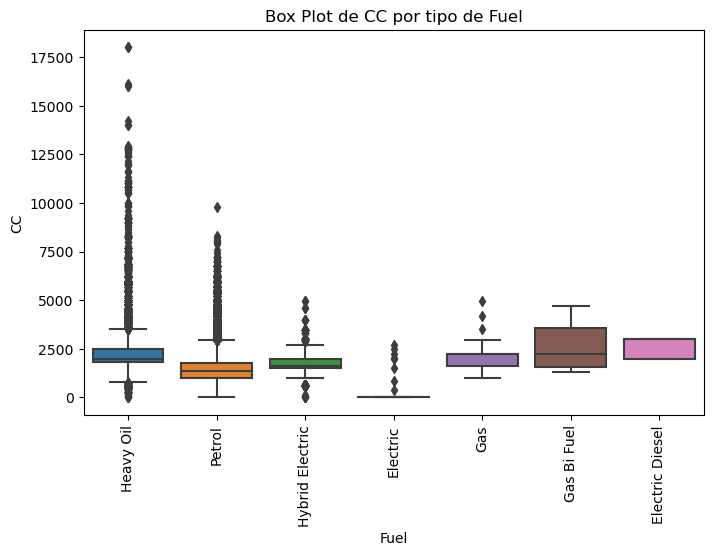

In [48]:
# Box plot CC
plt.figure(figsize=(8, 5))
sb.boxplot(x='Fuel', y='CC', data=data)
plt.xticks(rotation=90)
plt.xlabel('Fuel')
plt.ylabel('CC')
plt.title('Box Plot de CC por tipo de Fuel')
plt.show()

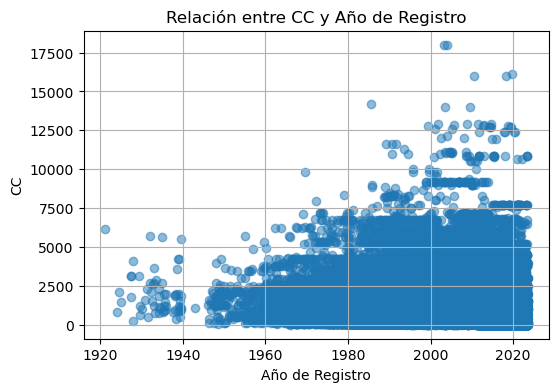

In [50]:
# Dispersión CC y Año Reg
plt.figure(figsize=(6, 4))
plt.scatter(data['First_Reg'], data['CC'], alpha=0.5)
plt.title('Relación entre CC y Año de Registro')
plt.xlabel('Año de Registro')
plt.ylabel('CC')
plt.grid(True)
plt.show()

In [51]:
fuel_counts = data['Fuel'].value_counts()

# Muestra los resultados
print(fuel_counts)

Petrol             87902
Heavy Oil          33850
Hybrid Electric     2665
Electric            2056
Gas                   53
Electric Diesel       12
Gas Bi Fuel            6
Name: Fuel, dtype: int64


C:\Users\vicky\AppData\Local\Temp\ipykernel_18992\1934704439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricos['Año_Registro_Jersey'] = electricos['Reg_Jersey'].dt.year


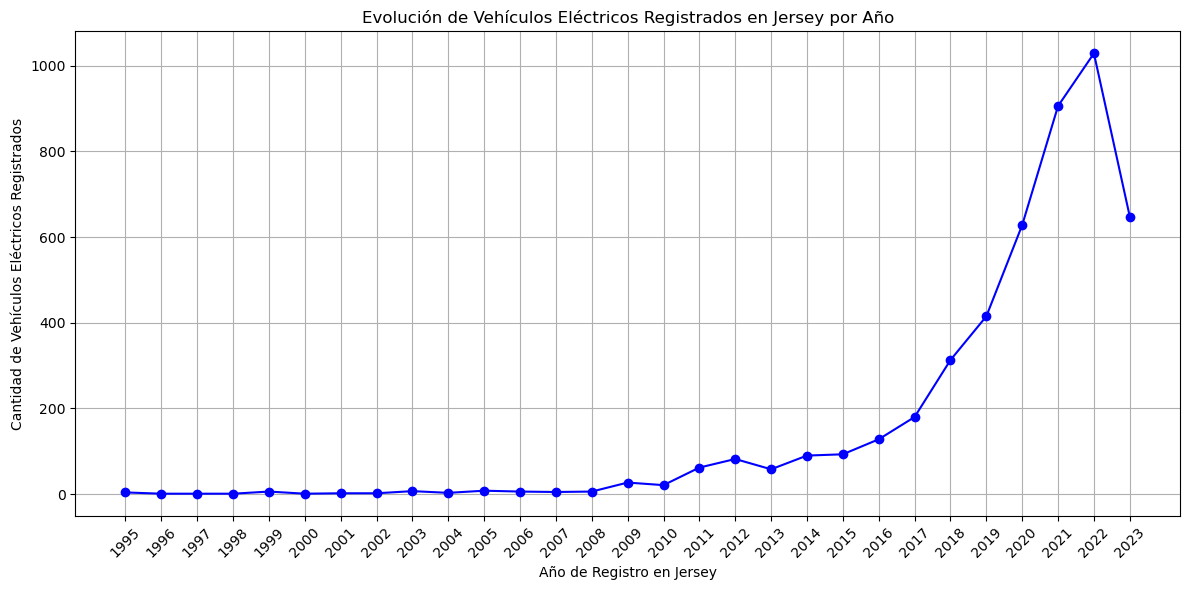

In [73]:
electricos = data[data['Fuel'].str.contains('Electric', case=False, na=False)]
electricos['Año_Registro_Jersey'] = electricos['Reg_Jersey'].dt.year
conteo_por_año = electricos.groupby('Año_Registro_Jersey')['Fuel'].count()

# Crear un gráfico de barras para mostrar la evolución de registros a lo largo de los años
plt.figure(figsize=(12, 6))
plt.plot(conteo_por_año.index, conteo_por_año.values, marker='o', linestyle='-', color='b')
plt.title('Evolución de Vehículos Eléctricos Registrados en Jersey por Año')
plt.xlabel('Año de Registro en Jersey')
plt.ylabel('Cantidad de Vehículos Eléctricos Registrados')
plt.grid(True)
plt.xticks(conteo_por_año.index, rotation=45)

plt.tight_layout()
plt.show()

In [82]:
tabla_hor = pd.DataFrame(conteo_por_año).T
tabla_hor

Año_Registro_Jersey,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Fuel,4,1,1,1,6,1,2,2,7,3,...,90,93,128,180,313,415,628,906,1029,648


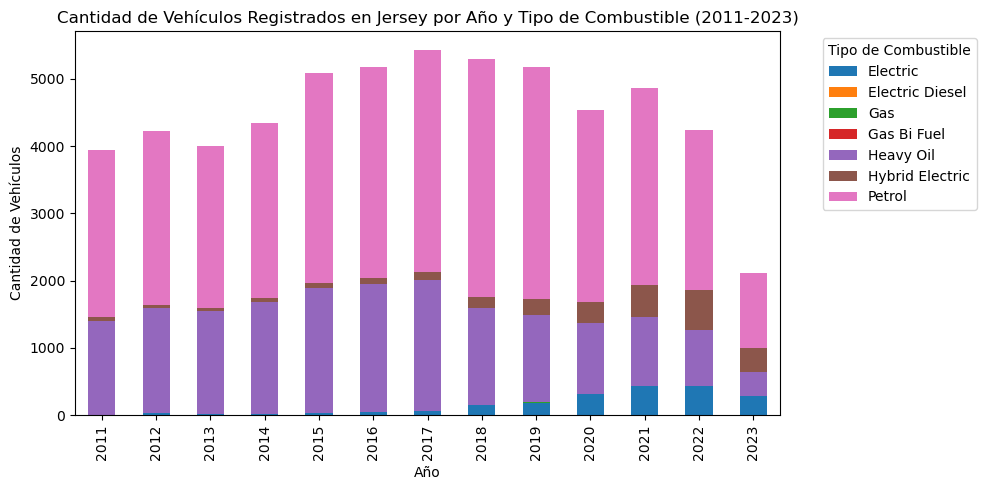

In [83]:
data_años = data[(data['Reg_Jersey'].dt.year >= 2013) & (data['Reg_Jersey'].dt.year <= 2023)]

# crosstab vehículos x año y Fuel
tabla1 = pd.crosstab(data_años['Reg_Jersey'].dt.year, data_filtered['Fuel'])

# Stacked bar graph
table.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Cantidad de Vehículos Registrados en Jersey por Año y Tipo de Combustible (2011-2023)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Vehículos')
plt.legend(title='Tipo de Combustible', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

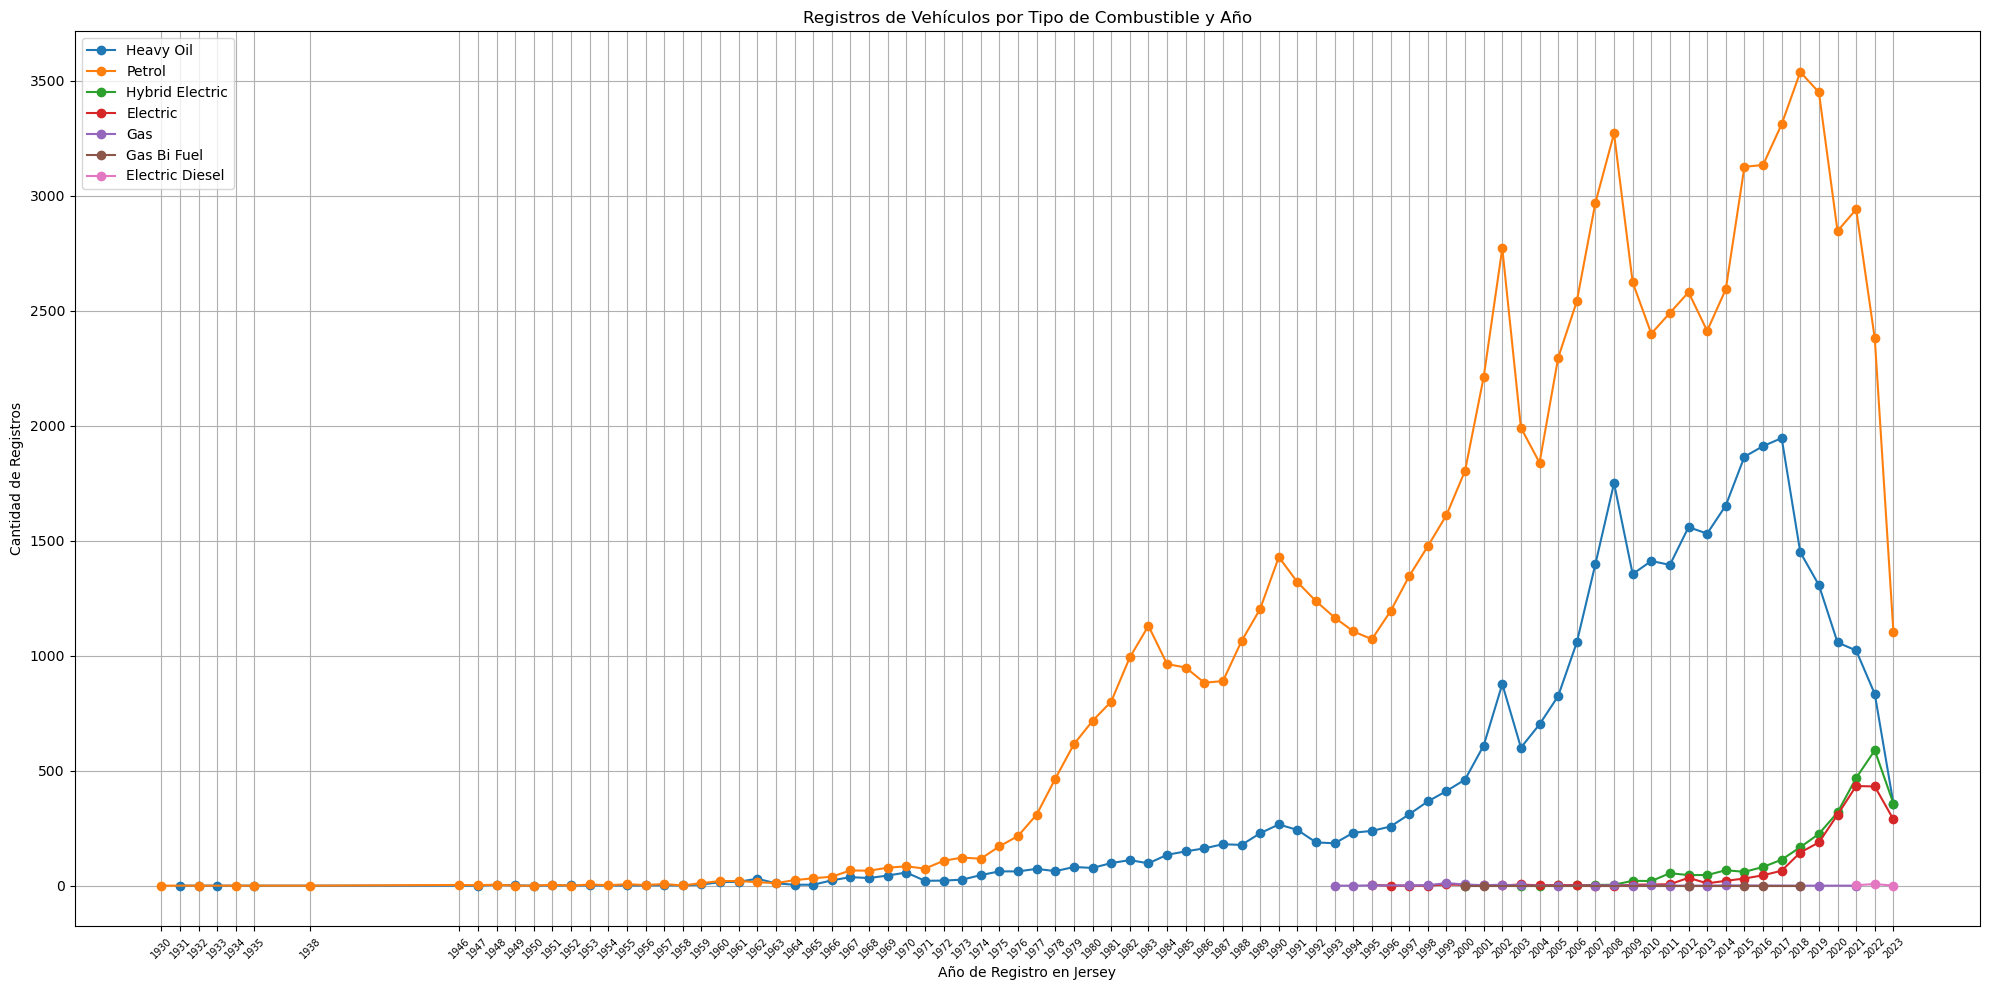

In [103]:
plt.figure(figsize=(20, 10))
ax = plt.gca()
años = data['Reg_Jersey'].dt.year.unique()

for fuel in data['Fuel'].unique():
    fuel_data = data[data['Fuel'] == fuel]    
    registro_por_año = fuel_data['Reg_Jersey'].dt.year.value_counts().sort_index()
    plt.plot(registro_por_año.index, registro_por_año.values, marker='o', label=fuel)

plt.title('Registros de Vehículos por Tipo de Combustible y Año')
plt.xlabel('Año de Registro en Jersey')
plt.ylabel('Cantidad de Registros')
plt.grid(True)

plt.legend()
plt.xticks(años, rotation=45, fontsize=7)

plt.tight_layout()
plt.show()

In [84]:
tabla1

Fuel,Electric,Electric Diesel,Gas,Gas Bi Fuel,Heavy Oil,Hybrid Electric,Petrol
Reg_Jersey,,,,,,,
2013,11,0,1,0,1531,47,2412
2014,22,0,2,0,1653,68,2593
2015,32,0,0,1,1865,61,3125
2016,46,0,0,1,1911,82,3133
2017,66,0,0,0,1946,114,3310
2018,145,0,1,1,1450,168,3537
2019,189,0,1,0,1307,226,3449
2020,309,0,0,0,1058,319,2846
2021,434,3,1,0,1023,469,2940


In [90]:
modelo_comun = data['Model'].value_counts().idxmax()
cantidad_registro = data['Model'].value_counts().max() # Cantidad
fuel_modelo_comun = data[data['Model'] == modelo_comun]['Fuel'].iloc[0] # su Fuel

# Imprimir los resultados
print("El modelo más comúnmente registrado en Jersey es:", modelo_comun)
print("Su tipo de combustible:", fuel_modelo_comun)
print("Cantidad de veces registrado:", cantidad_registro)

El modelo más comúnmente registrado en Jersey es: FIESTA ZETEC
Su tipo de combustible: Petrol
Cantidad de veces registrado: 1076


In [104]:
correlacion = data['CC'].corr(data['CO2'], method='pearson')
print("Coeficiente de correlación de Pearson entre CC y CO2:", correlacion)

Coeficiente de correlación de Pearson entre CC y CO2: 0.43689825062219095


######  Existe una correlación positiva moderada entre CC y CO2 de 0.437 , lo que significa que en general a medida que la capacidad cúbica (CC) de un vehículo aumenta también tienden a aumentar sus emisiones de CO2. Sin embargo, la correlación no es extremadamente fuerte, lo cuál indica que otros factores también pueden influir en las emisiones de CO2 de los vehículos.

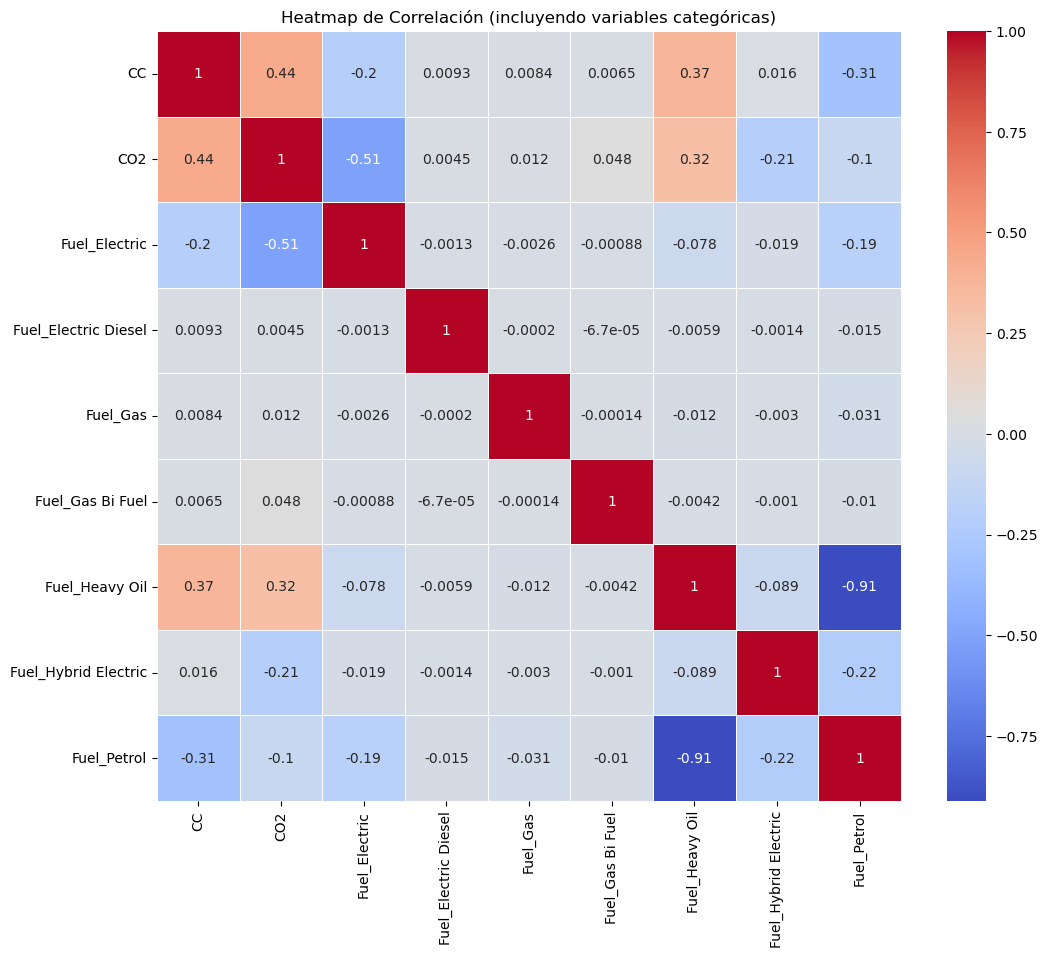

In [106]:
data_encoded = pd.get_dummies(data, columns=['Fuel'])  
correlation_matrix = data_encoded.corr()

plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Heatmap de Correlación (incluyendo variables categóricas)")
plt.show()

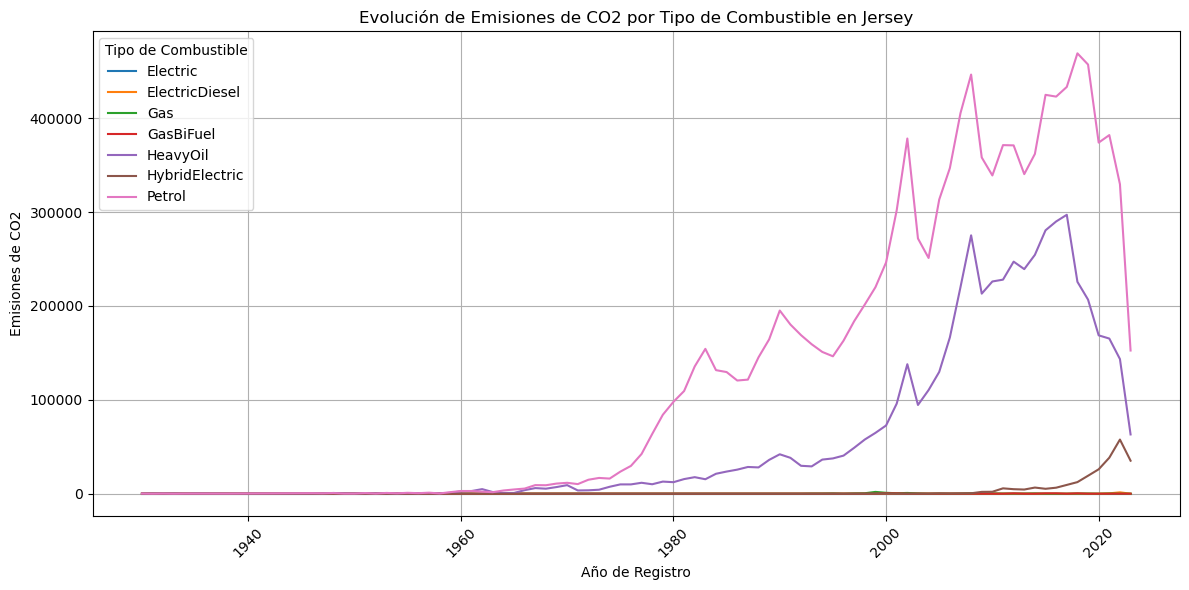

In [109]:
pivot_table = data.pivot_table(index=data['Reg_Jersey'].dt.year, columns='Fuel', values='CO2', aggfunc='sum', fill_value=0)

pivot_table.plot(figsize=(12, 6))
plt.title('Evolución de Emisiones de CO2 por Tipo de Combustible en Jersey')
plt.xlabel('Año de Registro')
plt.ylabel('Emisiones de CO2')
plt.grid(True)
plt.legend(title='Tipo de Combustible')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [115]:
electricos = data[data['Fuel'].str.contains('Electric', case=False, na=False)]
electricos['Año_Registro_Jersey'] = electricos['Reg_Jersey'].dt.year
conteo_por_año = electricos.groupby('Año_Registro_Jersey')['Fuel'].count()

percentage_increase = conteo_por_año.pct_change() * 100

# Crear un DataFrame con los resultados
result_df = pd.DataFrame({'Año': conteo_por_año.index, 'Cantidad': conteo_por_año.values, 'Aumento Porcentual': percentage_increase.values})

# Formatear el porcentaje para que se muestre con el número
result_df['Aumento Porcentual'] = result_df['Aumento Porcentual'].map('{:.2f}%'.format)

# Mostrar el DataFrame resultante
result_df

C:\Users\vicky\AppData\Local\Temp\ipykernel_18992\2832580208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricos['Año_Registro_Jersey'] = electricos['Reg_Jersey'].dt.year


,Año,Cantidad,Aumento Porcentual
0,1995,4,nan%
1,1996,1,-75.00%
2,1997,1,0.00%
3,1998,1,0.00%
4,1999,6,500.00%
5,2000,1,-83.33%
6,2001,2,100.00%
7,2002,2,0.00%
8,2003,7,250.00%
9,2004,3,-57.14%


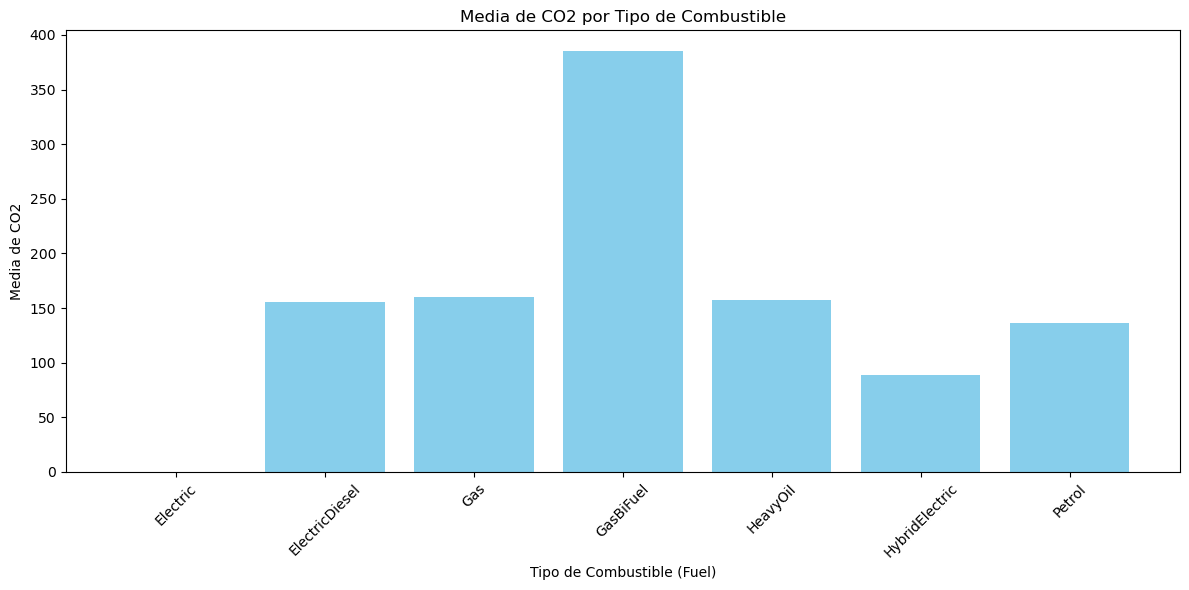

In [119]:
mean_co2_fuel = data.groupby('Fuel')['CO2'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(mean_co2_fuel['Fuel'], mean_co2_fuel['CO2'], color='skyblue')
plt.title('Media de CO2 por Tipo de Combustible')
plt.xlabel('Tipo de Combustible (Fuel)')
plt.ylabel('Media de CO2')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

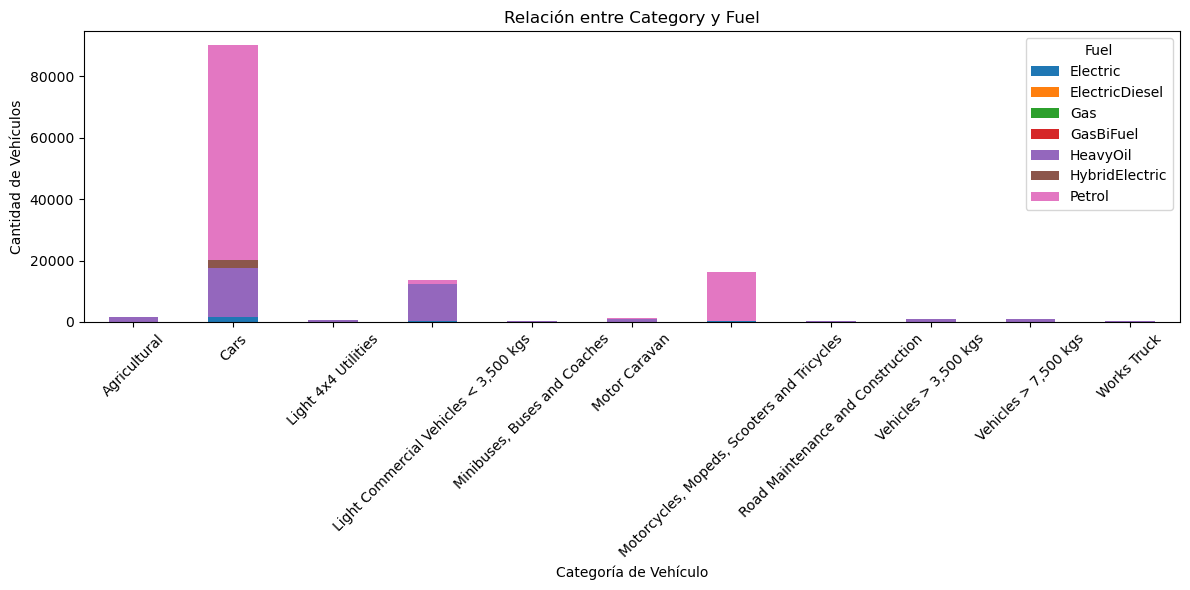

In [118]:
contingency_table = pd.crosstab(data['Category'], data['Fuel'])

contingency_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relación entre Category y Fuel')
plt.xlabel('Categoría de Vehículo')
plt.ylabel('Cantidad de Vehículos')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()